In [1]:
#importing packages and libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#reading the data
data = pd.read_excel(r'C:\Users\Lenovo\SSN Study Materials\Processed Dataset\Car Price Prediction Dataset Outliers Treated with Price as 1st Column.xlsx')

In [3]:
data

,price,Unnamed: 0,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,13495.0,0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,...,four,130,mpfi,3.47,3.775,9.000000,111.0,5000.0,21.0,27.0
1,16500.0,1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,...,four,130,mpfi,3.47,3.775,9.000000,111.0,5000.0,21.0,27.0
2,16500.0,2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,...,six,152,mpfi,2.68,3.470,9.000000,154.0,5000.0,19.0,26.0
3,13950.0,3,4,2,audi 100 ls,gas,std,four,sedan,fwd,...,four,109,mpfi,3.19,3.400,10.000000,102.0,5500.0,24.0,30.0
4,17450.0,4,5,2,audi 100ls,gas,std,four,sedan,4wd,...,five,136,mpfi,3.19,3.400,8.000000,115.0,5500.0,18.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,...,four,141,mpfi,3.78,3.150,9.500000,114.0,5400.0,23.0,28.0
201,19045.0,201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,...,four,141,mpfi,3.78,3.150,8.700000,160.0,5300.0,19.0,25.0
202,21485.0,202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,...,six,173,mpfi,3.58,2.870,8.800000,134.0,5500.0,18.0,23.0
203,22470.0,203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,...,six,145,idi,3.01,3.400,10.142537,106.0,4800.0,26.0,27.0


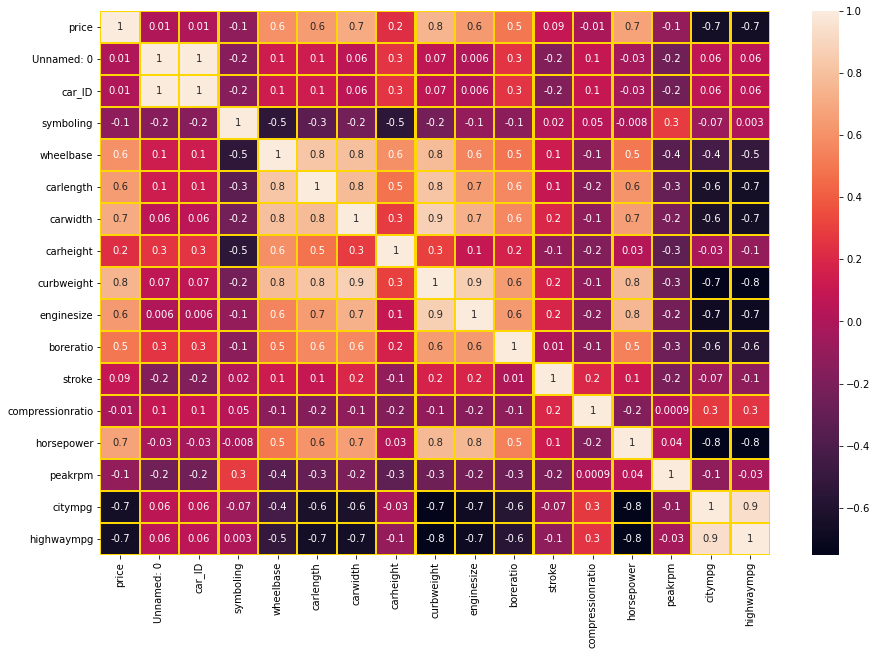

In [4]:
#Correlation Matrix
plt.figure(figsize =(15,10))
sns.heatmap(data.corr(),robust=True,fmt='.1g',linewidths=1.3,linecolor='gold',annot=True);

In [5]:
#Dropping columns that doesn't affect the output variable
data.drop(data.columns[[1, 2, 3, 4, 7, 10, 13, 16, 18, 19, 26]], axis = 1, inplace = True)

In [6]:
#One-Hot Encoding categorical variables in columns that affect the output variable
df = pd.get_dummies(data, columns = ['fueltype','aspiration','carbody','drivewheel','cylindernumber'], drop_first = True)

In [7]:
df

,price,wheelbase,carlength,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,...,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495.0,88.6,168.8,48.8,2548,3.47,3.775,9.000000,111.0,5000.0,...,0,0,0,1,0,1,0,0,0,0
1,16500.0,88.6,168.8,48.8,2548,3.47,3.775,9.000000,111.0,5000.0,...,0,0,0,1,0,1,0,0,0,0
2,16500.0,94.5,171.2,52.4,2823,2.68,3.470,9.000000,154.0,5000.0,...,0,0,0,1,0,0,1,0,0,0
3,13950.0,99.8,176.6,54.3,2337,3.19,3.400,10.000000,102.0,5500.0,...,1,0,1,0,0,1,0,0,0,0
4,17450.0,99.4,176.6,54.3,2824,3.19,3.400,8.000000,115.0,5500.0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,109.1,188.8,55.5,2952,3.78,3.150,9.500000,114.0,5400.0,...,1,0,0,1,0,1,0,0,0,0
201,19045.0,109.1,188.8,55.5,3049,3.78,3.150,8.700000,160.0,5300.0,...,1,0,0,1,0,1,0,0,0,0
202,21485.0,109.1,188.8,55.5,3012,3.58,2.870,8.800000,134.0,5500.0,...,1,0,0,1,0,0,1,0,0,0
203,22470.0,109.1,188.8,55.5,3217,3.01,3.400,10.142537,106.0,4800.0,...,1,0,0,1,0,0,1,0,0,0


In [8]:
#Splitting the X and y values
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [9]:
#Test, Train Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
#Fitting the model to random forest regressor
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=50, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(y_pred)

[ 5946.78       16719.31842283 12196.89833333  6404.8
 10199.32       14170.98842283  5702.5         8624.62
 17282.79675616  6824.8        20216.44       15587.4622998
 12555.76       16632.31421141  6425.17333333 13099.20666667
 11940.44666667 18942.47334     8670.54        6711.66
  9534.42       15207.73421141 10219.325      14563.7550895
 16799.18263424  6999.38        7528.14       14332.6194799
  8196.68        6676.42        8237.3        13166.72754475
 14468.06474839  9968.78        7021.04       14290.35582234
  9257.24       16339.98089141  6082.7        14416.51845659
  6380.57333333]


In [12]:
#Performance metrics of the algorithm
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 1378.0211431132268
Mean Squared Error: 3771751.3216290795
Root Mean Squared Error: 1942.099719795325
R2 Score: 0.8202853739952665
